In [1]:
import torch
from torch import nn
import sklearn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path

## Load Data

In [2]:
X_array, y_array = make_circles(n_samples=1000,
                    shuffle=True,
                    noise=0.03,
                    random_state=42)

## NumPy array to torch Tensor

In [3]:
X = torch.from_numpy(X_array).type(torch.float)
y = torch.from_numpy(y_array).type(torch.float)

## Train/Test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
y_train = y_train.unsqueeze(dim=1)
y_test = y_test.unsqueeze(dim=1)

In [5]:
# name dimensions
X1 = X_array[:, 0]
X2 = X_array[:, 1]

## Visualise

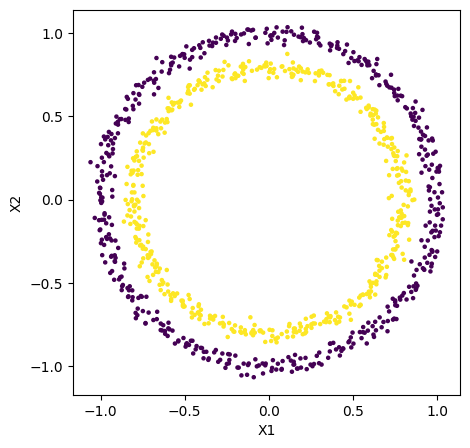

In [6]:
plt.figure(figsize=(5,5))
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(X1, X2, s=5, c=y)

## Build model

In [7]:
class BinaryClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Sequential(
            nn.Linear(in_features=2,
                      out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10,
                      out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10,
                      out_features=1),
            nn.ReLU()
        )

    def forward(self, X: torch.Tensor):
        return self.linear_layer(X)

In [8]:
model = BinaryClassificationModel()

## Train/Evaluation model

In [9]:
torch.manual_seed(42)

# define training function
def train_model(model : torch.nn.Module,
                x_train : torch.Tensor,
                y_train : torch.Tensor,
                loss_fn : torch.nn.functional,
                acc_fn : torch.nn.functional,
                optimizer : torch.optim):
    model.train()
    train_logits = model(x_train)
    train_pred = torch.round(torch.sigmoid(train_logits))
    train_acc = acc_fn(train_pred, y_train)
    train_loss = loss_fn(train_logits, y_train)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    return train_loss, train_acc


# define evaluation function
def eval_model(model : torch.nn.Module,
               x_test : torch.Tensor,
               y_test : torch.Tensor,
               loss_fn : torch.nn.functional,
               acc_fn : torch.nn.functional):
    model.eval()
    with torch.inference_mode():
        test_logits = model(x_test)
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = acc_fn(test_pred, y_test)
    return test_loss, test_acc

## Train/Test loop

In [15]:
# define Accuracy function
def accuracy(y_pred, y_true):
    correct = torch.eq(y_pred, y_true).sum().item()
    return (correct/len(y_true))*100

# define Loss function
loss_fn = nn.BCEWithLogitsLoss()

# define Optimizer
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.2)

# define Acuracy function
acc_fn = accuracy

epochs = 1500
torch.manual_seed(42)

epoch_values = []
train_loss_values = []
test_loss_values = []
for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_model(model,
                        X_train,
                        y_train,
                        loss_fn,
                        acc_fn,
                        optimizer)
    test_loss, test_acc = eval_model(model,
                      X_test,
                      y_test,
                      loss_fn,
                      acc_fn)
    if epoch%100==0:
       epoch_values.append(epoch)
       train_loss_values.append(train_loss)
       test_loss_values.append(test_loss)
       print(f"Epoch : {epoch} | Train_loss : {train_loss :.3f} | Train_acc : {train_acc :.2f}% | Test_loss : {test_loss :3f} | test_acc : {test_acc :.2f}%")
    

  0%|          | 0/1500 [00:00<?, ?it/s]

 43%|████▎     | 643/1500 [00:00<00:00, 3273.54it/s]

Epoch : 0 | Train_loss : 0.351 | Train_acc : 99.62% | Test_loss : 0.378513 | test_acc : 98.00%
Epoch : 100 | Train_loss : 0.350 | Train_acc : 99.62% | Test_loss : 0.376597 | test_acc : 98.50%
Epoch : 200 | Train_loss : 0.349 | Train_acc : 98.38% | Test_loss : 0.375281 | test_acc : 98.50%
Epoch : 300 | Train_loss : 0.348 | Train_acc : 99.00% | Test_loss : 0.377435 | test_acc : 98.00%
Epoch : 400 | Train_loss : 0.347 | Train_acc : 99.50% | Test_loss : 0.377654 | test_acc : 98.00%
Epoch : 500 | Train_loss : 0.348 | Train_acc : 100.00% | Test_loss : 0.375503 | test_acc : 98.50%
Epoch : 600 | Train_loss : 0.347 | Train_acc : 98.50% | Test_loss : 0.374919 | test_acc : 98.50%


 90%|█████████ | 1354/1500 [00:00<00:00, 3459.29it/s]

Epoch : 700 | Train_loss : 0.347 | Train_acc : 99.12% | Test_loss : 0.376531 | test_acc : 98.50%
Epoch : 800 | Train_loss : 0.346 | Train_acc : 99.75% | Test_loss : 0.378728 | test_acc : 98.00%
Epoch : 900 | Train_loss : 0.346 | Train_acc : 99.75% | Test_loss : 0.374985 | test_acc : 98.50%
Epoch : 1000 | Train_loss : 0.346 | Train_acc : 99.50% | Test_loss : 0.377699 | test_acc : 98.00%
Epoch : 1100 | Train_loss : 0.345 | Train_acc : 99.12% | Test_loss : 0.373797 | test_acc : 98.50%
Epoch : 1200 | Train_loss : 0.345 | Train_acc : 99.25% | Test_loss : 0.374366 | test_acc : 98.50%
Epoch : 1300 | Train_loss : 0.345 | Train_acc : 98.88% | Test_loss : 0.375092 | test_acc : 98.50%
Epoch : 1400 | Train_loss : 0.345 | Train_acc : 100.00% | Test_loss : 0.377092 | test_acc : 98.50%


100%|██████████| 1500/1500 [00:00<00:00, 3390.03it/s]


## Train/Test loss

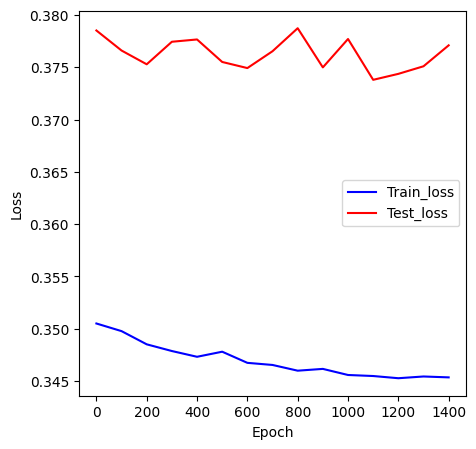

In [16]:
with torch.inference_mode():
    plt.figure(figsize=(5,5))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(epoch_values, train_loss_values, c='b', label='Train_loss')
    plt.plot(epoch_values, test_loss_values, c='r', label='Test_loss')
    plt.legend()

In [12]:
model.state_dict()

OrderedDict([('linear_layer.0.weight',
              tensor([[ 1.6765,  1.5435],
                      [ 1.7481, -0.1202],
                      [ 0.9704, -0.2202],
                      [ 0.1942, -0.1719],
                      [ 1.2666, -1.5302],
                      [-0.2312, -1.7893],
                      [ 1.5936, -0.5224],
                      [-1.5782, -1.7379],
                      [-0.2086, -0.5140],
                      [-1.3362,  1.8277]])),
             ('linear_layer.0.bias',
              tensor([-0.7035, -0.2656,  1.2663,  0.6657, -0.7613, -0.3715, -0.1625, -0.6236,
                       0.7644, -0.1623])),
             ('linear_layer.2.weight',
              tensor([[-0.9242, -1.0410,  0.7126,  0.4487, -1.0328, -1.0017, -0.7873, -1.0305,
                        0.5770, -1.2474],
                      [ 0.1260,  0.1804,  0.0540, -0.1522, -0.2901, -0.1763, -0.2991,  0.0786,
                       -0.1345, -0.1143],
                      [ 0.3802,  0.0054, -0.0224, -

## Sava model

In [13]:
model_path = Path('models')
model_path.mkdir(parents=True,
                 exist_ok=True)
model_name = "BinaryClassificationModel.pt"
torch.save(obj=model,
           f='/Users/navalmor/Desktop/PyTorch_Learning/classification/models/BinaryClassificationModel.pt')

## Load model

In [14]:
loaded_model = torch.load('/Users/navalmor/Desktop/PyTorch_Learning/classification/models/BinaryClassificationModel.pt')
loaded_model

BinaryClassificationModel(
  (linear_layer): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=1, bias=True)
    (5): ReLU()
  )
)